# Introduction to Statistical Learning ~~in R~~ *(in Python)*
## Chapter 3: Linear Regression

In [113]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import data
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics
from patsy import dmatrices


### Lab: Simple linear regression (3.6.2)

In [2]:
boston = data.download_boston()

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
Y, X = dmatrices('medv~lstat', data=boston, return_type='dataframe')
regression = sm.OLS(Y, X).fit()

print('\nY:')
display(Y.head())
print('\nX:')
display(X.head())
print('\nRegression summary:')
display(regression.summary())
print('\nRegression params:')
display(regression.params)


Y:


,medv
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2



X:


,Intercept,lstat
1,1.0,4.98
2,1.0,9.14
3,1.0,4.03
4,1.0,2.94
5,1.0,5.33



Regression summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           5.08e-88
Time:                        16:34:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Regression params:


Intercept    34.553841
lstat        -0.950049
dtype: float64

<IPython.core.display.Javascript object>


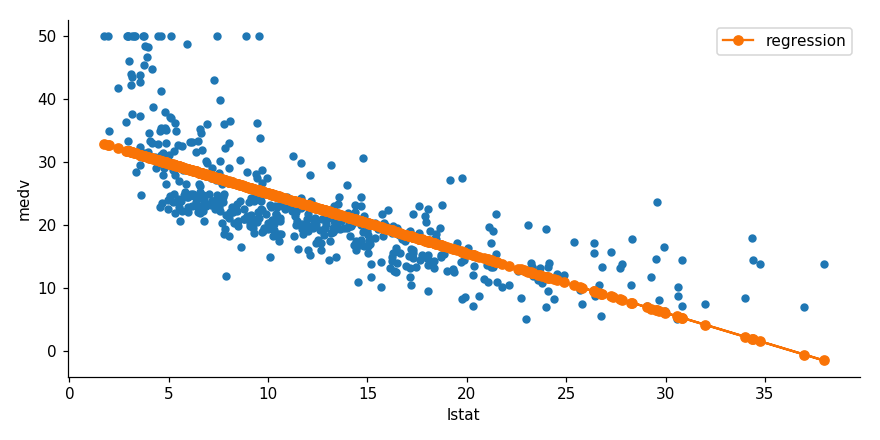

In [5]:
estimate = regression.predict(X)

ax = boston.plot.scatter('lstat', 'medv')
ax.plot(boston['lstat'], estimate, 'o-', color='xkcd:orange', label='regression')
ax.legend();

### Lab: Multiple linear regression (3.6.3)

In [6]:
Y, X = dmatrices('medv ~ lstat + age', data=boston, return_type='dataframe')
regression = sm.OLS(Y, X).fit()

display(Y.head(), X.head(), regression.summary())

,medv
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2


,Intercept,lstat,age
1,1.0,4.98,65.2
2,1.0,9.14,78.9
3,1.0,4.03,61.1
4,1.0,2.94,45.8
5,1.0,5.33,54.2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           2.98e-88
Time:                        16:35:06   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
boston['lstat'].dtype

dtype('float64')

In [35]:
f.add_subplot?

<IPython.core.display.Javascript object>


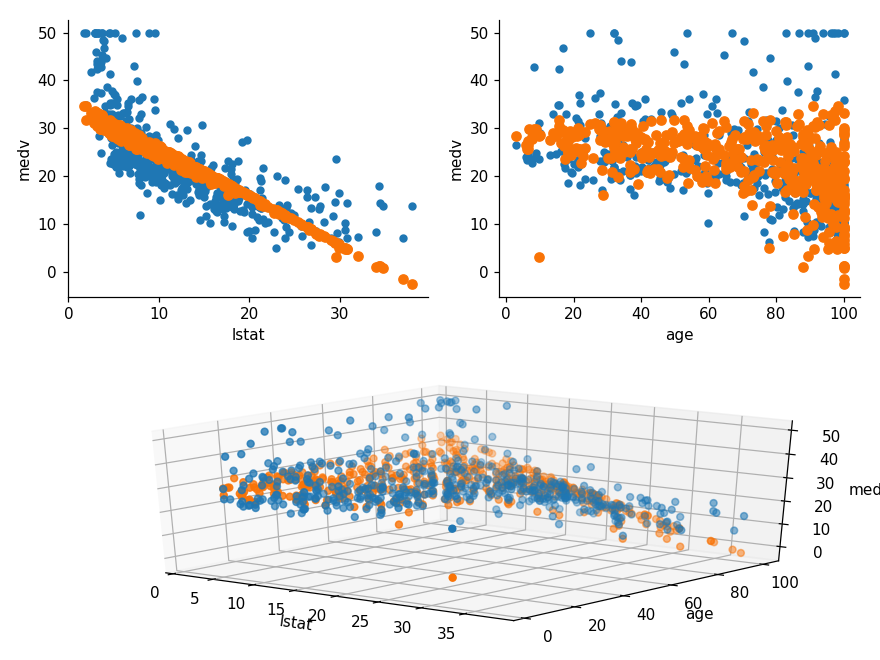

[Text(0.5,0,'medv'), Text(0.5,0,'age'), Text(0.5,0,'lstat')]

In [40]:
estimate = regression.predict(X)

f = plt.figure(figsize=(8, 6))

ax = f.add_subplot(221)
boston.plot.scatter('lstat', 'medv', ax=ax)
ax.plot(boston['lstat'], estimate, 'o', color='xkcd:orange')

ax = f.add_subplot(222)
boston.plot.scatter('age', 'medv', ax=ax)
ax.plot(boston['age'], estimate, 'o', color='xkcd:orange')

ax = f.add_subplot(212, projection='3d')
ax.scatter(boston['lstat'], boston['age'], boston['medv'])
ax.scatter(boston['lstat'], boston['age'], estimate, color='xkcd:orange')
ax.set(xlabel='lstat', ylabel='age', zlabel='medv');

### Lab: Interaction Terms (3.6.4)

In [98]:
Y, X = dmatrices('medv ~ lstat * age', data=boston, return_type='dataframe')
regression = sm.OLS(Y, X).fit()

display(Y.head(), X.head(), regression.summary())

,medv
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2


,Intercept,lstat,age,lstat:age
1,1.0,4.98,65.2,324.696
2,1.0,9.14,78.9,721.146
3,1.0,4.03,61.1,246.233
4,1.0,2.94,45.8,134.652
5,1.0,5.33,54.2,288.886


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           4.86e-88
Time:                        17:37:36   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>


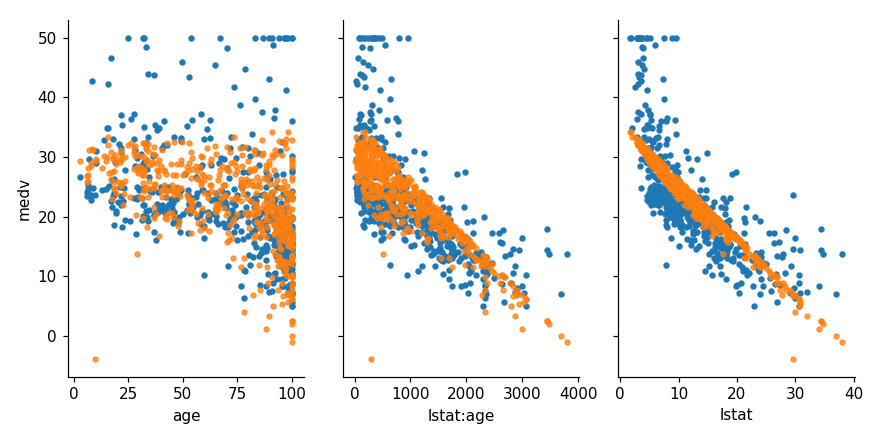

In [101]:
def scatter_prediction(estimate, Y, X):
    predictors = set(X.columns) - set(['Intercept'])

    f, axs = plt.subplots(ncols=len(predictors), sharey='all', squeeze=False)
    axs = axs[0]

    axs[0].set(ylabel=Y.columns[0])

    for ax, predictor in zip(axs, predictors):
        ax.scatter(X[predictor], Y, s=10)
        ax.scatter(X[predictor], estimate, s=10, alpha=.75)
        ax.set(xlabel=predictor)


estimate = regression.predict(X)
scatter_prediction(estimate, Y, X)

### Lab: Non-linear Transformations of the Predictors (3.6.5)

<IPython.core.display.Javascript object>


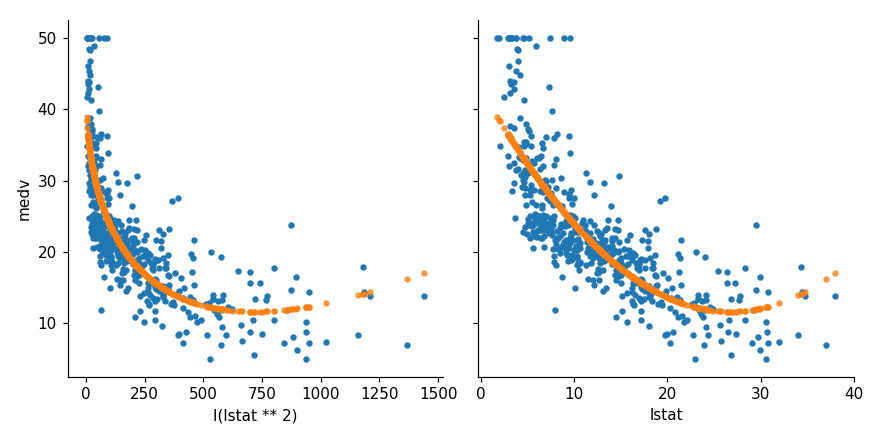

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 16 Jul 2018   Prob (F-statistic):          1.56e-112
Time:                        17:01:04   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
Y, X = dmatrices('medv ~ lstat + I(lstat**2)', data=boston, return_type='dataframe')
regression = sm.OLS(Y, X).fit()

estimate = regression.predict(X)
scatter_prediction(estimate, Y, X)
display(regression.summary())

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the anova() function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [82]:

reg1 = sm.OLS(*dmatrices('medv ~ lstat', data=boston)).fit()
reg2 = sm.OLS(*dmatrices('medv ~ lstat + I(lstat**2)', data=boston)).fit()

sm.stats.anova_lm(reg1, reg2)

/home/riquelmej/dev/venv3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/riquelmej/dev/venv3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/riquelmej/dev/venv3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor,
lstat, while Model 2 corresponds to the larger quadratic model that has two
predictors, lstat and lstat2. The anova() function performs a hypothesis
test comparing the two models. The null hypothesis is that the two models
fit the data equally well, and the alternative hypothesis is that the full
model is superior. Here the F-statistic is 135 and the associated p-value is
virtually zero. This provides very clear evidence that the model containing
the predictors lstat and lstat2 is far superior to the model that only
contains the predictor lstat. This is not surprising, since earlier we saw
evidence for non-linearity in the relationship between medv and lstat.

### Applied 8

Perform a simple linear regression with mpg as the response and horsepower as the predictor

In [102]:
auto = data.download_auto()

Dropping 5 observations with missing data


In [149]:
Y, X = dmatrices('mpg ~ horsepower', data=auto, return_type='dataframe')
regression = sm.OLS(Y, X).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           7.03e-81
Time:                        17:52:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### i. Is there a relationship between the predictor and the response?

Yes, the coefficient of the slope is non-zero

#### ii. How strong is the relationship between the predictor and the response?

Not very strong

#### iii. Is the relationship between the predictor and the response positive or negative?

Negative

#### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [111]:
print('the prediction for {} is {}'.format(98, regression.predict([1, 98])))

the prediction for 98 is [24.46707715]


(b) Plot the response and the predictor.

(c) Produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

<IPython.core.display.Javascript object>


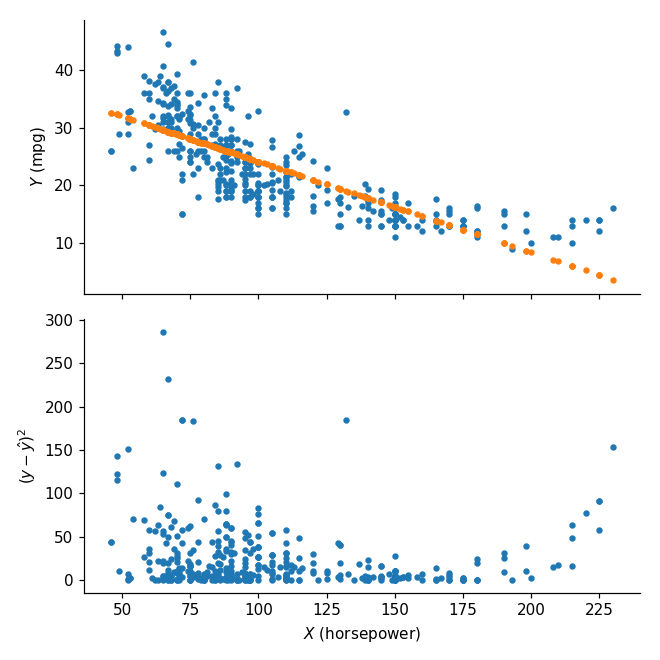

In [156]:
estimate = regression.predict(X)
f, axs = plt.subplots(nrows=2, sharex='all', figsize=(6, 6))

axs[0].scatter(X['horsepower'], Y['mpg'], s=10)
axs[0].scatter(X['horsepower'], estimate, s=10)
axs[0].set(ylabel='$Y$ (mpg)')
axs[1].scatter(X['horsepower'], np.square(Y['mpg'] - estimate), s=10)
axs[1].set(xlabel='$X$ (horsepower)', ylabel='$(y-\hat{y})^2$');

### Applied 9.

This question involves the use of multiple linear regression on the Auto data set.

#### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

<IPython.core.display.Javascript object>


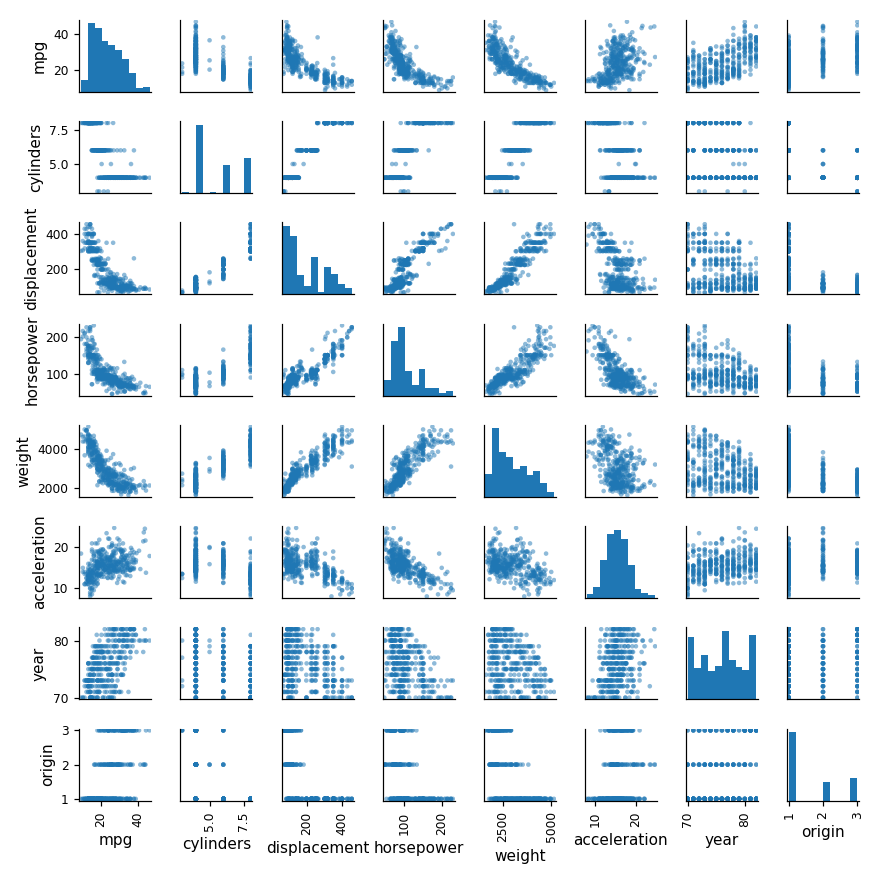

In [158]:
pd.plotting.scatter_matrix(auto, figsize=(8, 8));

#### (b) Compute the matrix of correlations between the variables. You will need to exclude the *name variable, which is qualitative.

In [164]:
auto.drop(['name'], axis=1).corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### (c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Print summary the results.

In [174]:
predictors = auto.drop(['name', 'mpg'], axis=1).columns

Y, X = dmatrices('mpg ~ {}'.format('+'.join(predictors)), data=auto)
regression = sm.OLS(Y, X).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 16 Jul 2018   Prob (F-statistic):          2.04e-139
Time:                        18:02:39   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comment on the output. For instance:
##### i. Is there a relationship between the predictors and the response?

Yes

##### ii. Which predictors appear to have a statistically significant relationship to the response?

Those with small $P>|t|$: displacement, weight, year, origin

##### iii. What does the coefficient for the year variable suggest?

Every extra year adds ~.75 mpg

#### (d) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

<IPython.core.display.Javascript object>


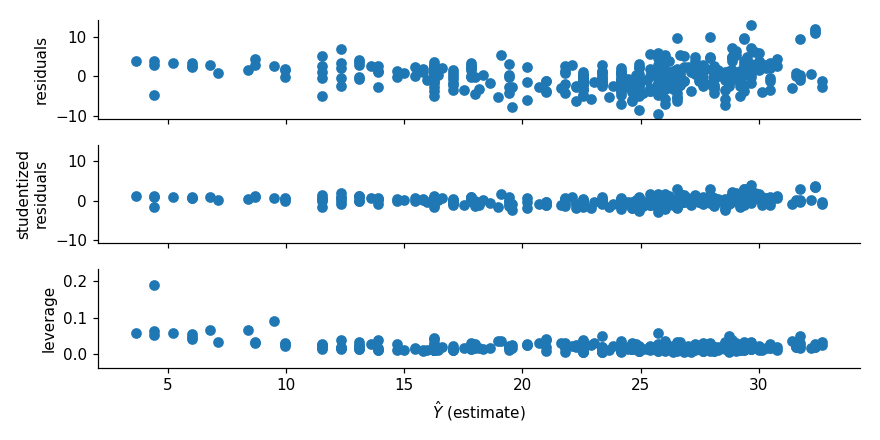

Biggest leverage: 13


<IPython.core.display.Javascript object>


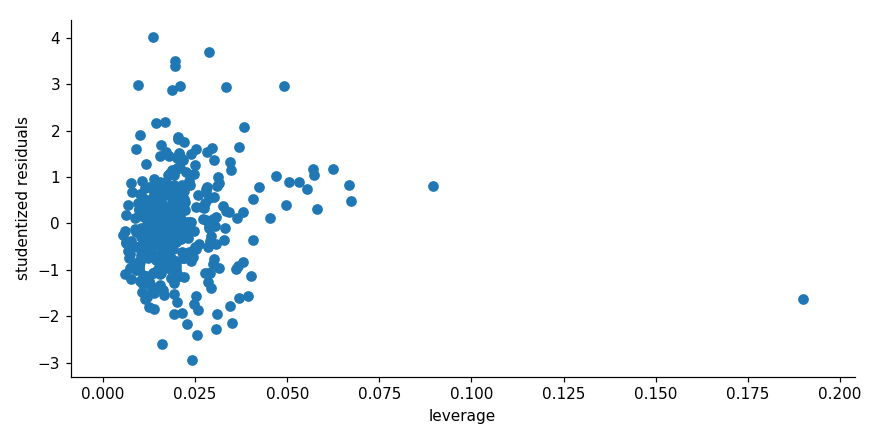

In [243]:
f, axs = plt.subplots(nrows=3, sharex='all')

influence = regression.get_influence().summary_frame()

axs[0].scatter(estimate, regression.resid)
axs[0].set(ylabel='residuals')
axs[1].scatter(estimate, influence['student_resid'])
axs[1].set(ylabel='studentized\nresiduals', ylim=axs[0].get_ylim())
axs[2].scatter(estimate, influence['hat_diag'])
axs[2].set(ylabel='leverage', xlabel='$\hat{Y}$ (estimate)');

print('Biggest leverage:', influence.hat_diag.idxmax())

f, ax = plt.subplots()
ax.scatter(influence['hat_diag'], influence['student_resid'])
ax.set(xlabel='leverage', ylabel='studentized residuals');

<IPython.core.display.Javascript object>


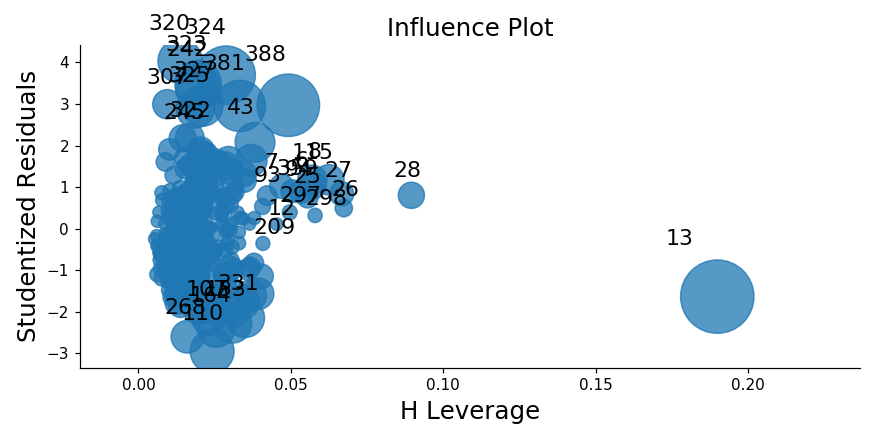

In [244]:
# the built-in version:
statsmodels.graphics.regressionplots.influence_plot(regression);

#### (e) Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [268]:
import itertools

formula = 'mpg ~ {}'.format(' + '.join('{0}:{1} + {0} + {1}'.format(*c) for c in itertools.combinations(predictors, 2)))
Y, X = dmatrices(formula, data=auto, return_type='dataframe')

display(X.head())

regression = sm.OLS(Y, X).fit()

display(regression.summary())

,Intercept,cylinders:displacement,cylinders,displacement,cylinders:horsepower,horsepower,cylinders:weight,weight,cylinders:acceleration,acceleration,...,horsepower:weight,horsepower:acceleration,horsepower:year,horsepower:origin,weight:acceleration,weight:year,weight:origin,acceleration:year,acceleration:origin,year:origin
0,1.0,2456.0,8.0,307.0,1040.0,130.0,28032.0,3504.0,96.0,12.0,...,455520.0,1560.0,9100.0,130.0,42048.0,245280.0,3504.0,840.0,12.0,70.0
1,1.0,2800.0,8.0,350.0,1320.0,165.0,29544.0,3693.0,92.0,11.5,...,609345.0,1897.5,11550.0,165.0,42469.5,258510.0,3693.0,805.0,11.5,70.0
2,1.0,2544.0,8.0,318.0,1200.0,150.0,27488.0,3436.0,88.0,11.0,...,515400.0,1650.0,10500.0,150.0,37796.0,240520.0,3436.0,770.0,11.0,70.0
3,1.0,2432.0,8.0,304.0,1200.0,150.0,27464.0,3433.0,96.0,12.0,...,514950.0,1800.0,10500.0,150.0,41196.0,240310.0,3433.0,840.0,12.0,70.0
4,1.0,2416.0,8.0,302.0,1120.0,140.0,27592.0,3449.0,84.0,10.5,...,482860.0,1470.0,9800.0,140.0,36214.5,241430.0,3449.0,735.0,10.5,70.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 16 Jul 2018   Prob (F-statistic):          4.01e-155
Time:                        18:40:15   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

In [269]:
print('Interactions sorted by significance:')
display(regression.pvalues.sort_values())

Interactions sorted by significance:


origin                       0.003446
acceleration:origin          0.003655
acceleration                 0.007354
displacement                 0.011921
displacement:year            0.013516
acceleration:year            0.030331
horsepower:acceleration      0.053252
year:origin                  0.060620
cylinders:year               0.073885
displacement:weight          0.093419
cylinders:acceleration       0.095843
horsepower:year              0.139161
horsepower                   0.147693
displacement:origin          0.218748
year                         0.253400
weight:year                  0.291816
displacement:acceleration    0.298534
weight:acceleration          0.305960
cylinders                    0.397381
cylinders:origin             0.414817
horsepower:weight            0.501243
Intercept                    0.504748
cylinders:displacement       0.600513
cylinders:horsepower         0.631568
cylinders:weight             0.689995
weight:origin                0.716229
displacement

<IPython.core.display.Javascript object>


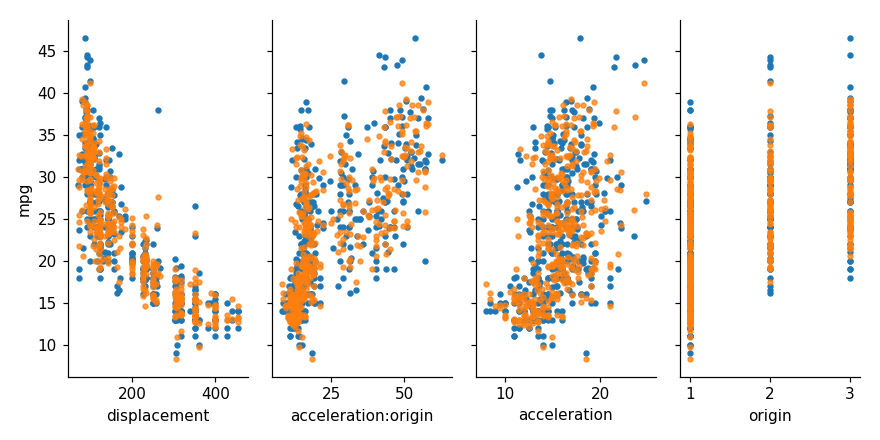

In [274]:
scatter_prediction(regression.predict(X), Y, X[regression.pvalues.sort_values().index[:4]])

#### (f) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

### Applied 11
In this problem we will investigate the t-statistic for the null hypothesis $$H_0 : \beta = 0$$ in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

To begin, we generate a predictor x and a response y as follows.

In [275]:
x = np.random.random(100)
y = 2 * x + np.random.random(100)

(a) Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate βˆ, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H0 : β = 0. Comment on these
results. (You can perform regression without an intercept using
the command lm(y∼x+0).)

In [276]:
regression = sm.OLS(y, x).fit()
display(regression.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1629.
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           2.72e-63
Time:                        18:45:20   Log-Likelihood:                -48.242
No. Observations:                 100   AIC:                             98.48
Df Residuals:                      99   BIC:                             101.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7721      0.069     40.367      0.000       2.636       2.908
==============================================================================
Omnibus:                        3.876   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                2.259
Skew:                           0.115   Prob(JB):                        0.323
Kurtosis:                       2.301   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.

In [277]:
regression = sm.OLS(x, y).fit()
display(regression.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1629.
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           2.72e-63
Time:                        18:46:50   Log-Likelihood:                 56.667
No. Observations:                 100   AIC:                            -111.3
Df Residuals:                      99   BIC:                            -108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3401      0.008     40.367      0.000       0.323       0.357
==============================================================================
Omnibus:                        3.432   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                2.152
Skew:                          -0.132   Prob(JB):                        0.341
Kurtosis:                       2.332   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(c) What is the relationship between the results obtained in (a) and
(b)?

(d) For the regression of Y onto X without an intercept, the tstatistic
for H0 : β = 0 takes the form β/ˆ SE(βˆ), where βˆ is
given by (3.38), and where


(These formulas are slightly different from those given in Sections
3.1.1 and 3.1.2, since here we are performing regression
without an intercept.) Show algebraically, and confirm numerically
in R, that the t-statistic can be written as

(e) Using the results from (d), argue that the t-statistic for the regression
of y onto x is the same as the t-statistic for the regression
of x onto y.

(f) In R, show that when regression is performed with an intercept,
the t-statistic for H0 : β1 = 0 is the same for the regression of y
onto x as it is for the regression of x onto y.

In [284]:
x_onto_y = sm.OLS(*dmatrices('x ~ y')).fit().tvalues
y_onto_x = sm.OLS(*dmatrices('y ~ x')).fit().tvalues
display(x_onto_y, y_onto_x)

array([-3.89299027, 21.02166637])

array([ 9.53375152, 21.02166637])

### Applied 12
This problem involves simple linear regression without an intercept

(a) Recall that the coefficient estimate βˆ for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?

(b) Generate an example in R with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is different
from the coefficient estimate for the regression of Y onto X.

(c) Generate an example in R with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is the
same as the coefficient estimate for the regression of Y onto X

### Applied 13

In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use set.seed(1) prior to
starting part (a) to ensure consistent results.

(a) Using the rnorm() function, create a vector, x, containing 100
observations drawn from a N(0, 1) distribution. This represents
a feature, X.

(b) Using the rnorm() function, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution i.e. a normal
distribution with mean zero and variance 0.25.

(c) Using x and eps, generate a vector y according to the model
Y = −1+0.5X + . (3.39)
What is the length of the vector y? What are the values of β0
and β1 in this linear model?

(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.
(e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do βˆ0 and βˆ1 compare to β0 and
β1?
(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() command to create an appropriate legend.
(g) Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.
(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
 in (b). Describe your results.
(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term  in (b). Describe your results.
(j) What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

### Applied 14

This problem focuses on the collinearity problem.
(a) Perform the following commands in R:
> set.seed(1)
> x1=runif (100)
> x2=0.5*x1+rnorm (100)/10
> y=2+2*x1+0.3*x2+rnorm (100)
The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?
(b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.
(c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and
βˆ2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?